# Simple Neural Network

## TensorFlow

In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-05-31 21:17:57.650958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Data Set

def load_coffee_data():
    """ Creates a coffee roasting data set.
        Roasting Duration: 12-15 minutes is best
        Temperature Range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min Is Best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) Is Best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

X, Y = load_coffee_data()

In [3]:
# X = Temperature & Duration
print(f"X Shape: {X.shape}")
print(f"X:\n{X[0:5]}")
print("\n")
# Y = Good Roast or Bad Roast
print(f"Y Shape: {Y.shape}")
print(f"Y:\n{Y[0:5]}")

X Shape: (200, 2)
X:
[[185.31763812  12.69396457]
 [259.92047498  11.86766377]
 [231.01357101  14.41424211]
 [175.3666449   11.72058651]
 [187.12086467  14.12973206]]


Y Shape: (200, 1)
Y:
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


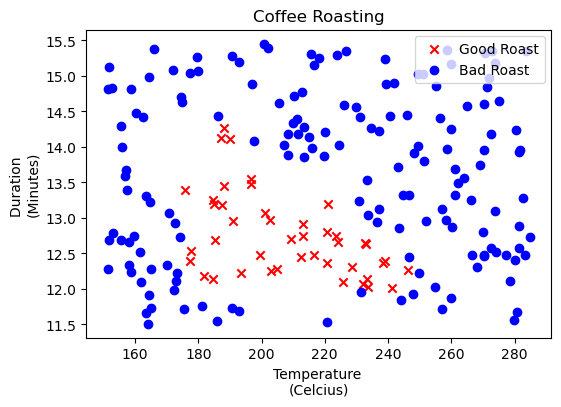

In [4]:
# Plot the Data Set

# Good Roast & Bad Roast
Y = Y.reshape(-1,)
pos = Y == 1
neg = Y == 0

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(X[pos][:,0], X[pos][:,1], marker="x", c="r", label="Good Roast")
ax.scatter(X[neg][:,0], X[neg][:,1], marker="o", c="b", label="Bad Roast")
ax.set_title(f"Coffee Roasting")
ax.set_xlabel("Temperature \n(Celcius)")
ax.set_ylabel("Duration \n(Minutes)")
ax.legend(loc='upper right')
plt.show()

In [5]:
# Original Shape
Y = Y.reshape(200, 1)

### Normalize the Data

In [6]:
print(f"Temperature Max, Min Pre-Normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min Pre-Normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

# Create a Normalization Layer
norm_l = tf.keras.layers.Normalization(axis=-1)
# Adapt the Data (Learns the mean and the variance)
norm_l.adapt(X)
# Normalize the Data
Xn = norm_l(X)

print(f"Temperature Max, Min Post-Normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min Post-Normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min Pre-Normalization: 284.99, 151.32
Duration    Max, Min Pre-Normalization: 15.45, 11.51
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2023-05-31 21:18:03.104894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Temperature Max, Min Post-Normalization: 1.66, -1.69
Duration    Max, Min Post-Normalization: 1.79, -1.70


In [7]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [8]:
print(f"Shape of a Single Row X: {Xt[0].shape}")
print(f"Shape of a Single Row Y: {Yt[0].shape}")

Shape of a Single Row X: (2,)
Shape of a Single Row Y: (1,)


## NN Model (TensorFlow)
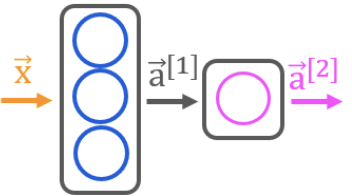

In [9]:
tf.random.set_seed(42) 
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'L1'),
        Dense(1, activation='sigmoid', name = 'L2')
    ]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L2 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [11]:
L1_num_params = 2 * 3 + 3   # W1 Parameters (# Units l-1 * # # Units l)  + b1 Parameters
L2_num_params = 3 * 1 + 1   # W2 Parameters (# Units l-1 * # # Units l)  + b2 Parameters
print("L1 Params =", L1_num_params, "\nL2 Params =", L2_num_params  )

L1 Params = 9 
L2 Params = 4


In [12]:
# Inspect the Weights and the Biases that TensorFlow has Instantiated
# W Shape = (# Units l-1, # Units l)
# b Shape = (# Units l,)

W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print("\n")
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.918518   -0.23322803  0.71858764]
 [ 0.04270303  0.52229726 -0.25360382]] 
b1(3,): [0. 0. 0.]


W2(3, 1):
 [[-0.89979786]
 [ 0.11450648]
 [-0.9550236 ]] 
b2(1,): [0.]


In [13]:
# The `model.compile` statement defines a loss function and specifies a compile optimization.
# The `model.fit` statement runs gradient descent and fits the weights to the data.

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6250/6250 [==============================] - 6s 891us/step - loss: 0.1667
Epoch 2/10
6250/6250 [==============================] - 6s 908us/step - loss: 0.0921
Epoch 3/10
6250/6250 [==============================] - 6s 885us/step - loss: 0.0236
Epoch 4/10
6250/6250 [==============================] - 6s 898us/step - loss: 0.0135
Epoch 5/10
6250/6250 [================

In [14]:
# Updated Weights and Biases

W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("\n")
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-11.051113    14.489116    -0.14264148]
 [ -0.21371864  12.023026    -8.969591  ]] 
b1: [-12.07344     1.8204899 -11.186701 ]


W2:
 [[-51.424587]
 [-43.521637]
 [-47.073475]] 
b2: [26.885876]


In [15]:
# Load Saved Weights and Biases
"""
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])

W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

model.get_layer("L1").set_weights([W1,b1])
model.get_layer("L2").set_weights([W2,b2])
"""

'\nW1 = np.array([\n    [-8.94,  0.29, 12.89],\n    [-0.17, -7.34, 10.79]] )\nb1 = np.array([-9.87, -9.28,  1.01])\n\nW2 = np.array([\n    [-31.38],\n    [-27.86],\n    [-32.79]])\nb2 = np.array([15.54])\n\nmodel.get_layer("L1").set_weights([W1,b1])\nmodel.get_layer("L2").set_weights([W2,b2])\n'

### Predictions

In [16]:
X_test = np.array([
    # Postive Example
    [200,13.9],
    # Negative Example
    [200,17]])   

# Normalize the Test Data
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("Predictions = \n", predictions)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 79ms/step
Predictions = 
 [[9.8909849e-01]
 [5.8058223e-08]]


In [17]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"Decisions = \n{yhat}")

Decisions = 
[[1.]
 [0.]]


In [18]:
# Same Function as the Cell Above

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## NumPy

In [19]:
# Data Set

X, Y = load_coffee_data()

# X = Temperature & Duration
print(f"X Shape: {X.shape}")
print(f"X:\n{X[0:5]}")
print("\n")
# Y = Good Roast or Bad Roast
print(f"Y Shape: {Y.shape}")
print(f"Y:\n{Y[0:5]}")

X Shape: (200, 2)
X:
[[185.31763812  12.69396457]
 [259.92047498  11.86766377]
 [231.01357101  14.41424211]
 [175.3666449   11.72058651]
 [187.12086467  14.12973206]]


Y Shape: (200, 1)
Y:
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [20]:
# Normalize the Data

print(f"Temperature Max, Min Pre-Normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min Pre-Normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

# Create a Normalization Layer
norm_l = tf.keras.layers.Normalization(axis=-1)
# Adapt the Data (Learns the mean and the variance)
norm_l.adapt(X)
# Normalize the Data
Xn = norm_l(X)

print(f"Temperature Max, Min Post-Normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min Post-Normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min Pre-Normalization: 284.99, 151.32
Duration    Max, Min Pre-Normalization: 15.45, 11.51
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Temperature Max, Min Post-Normalization: 1.66, -1.69
Duration    Max, Min Post-Normalization: 1.79, -1.70


## NN Model (NumPy)
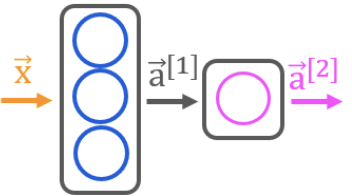

In [21]:
# Sigmoid Activation Function

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [22]:
# Dense Layer

def dense(a_in, W, b, g):
    """
    Computes the Dense Layer.
    Args:
      a_in (ndarray (n, )) : Data, 1 Example 
      W    (ndarray (n,j)) : Weight Matrix, n Features per Unit, j Units
      b    (ndarray (j, )) : Bias Vector, j Units  
    Returns
      a_out (ndarray (j,))  : j Units
    """
    # Number of Neurons in the Layer
    units = W.shape[1]
    # Activation Vector
    a_out = np.zeros(units)
    
    # In Each Unit
    for j in range(units):
        # Weights of the Current Neuron
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    
    return a_out

In [23]:
# Neural Network

def sequential(x, W1, b1, W2, b2, g):
    a1 = dense(x,  W1, b1, g)
    a2 = dense(a1, W2, b2, g)
    return(a2)

In [24]:
# Trained Weights and Biases

W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

### Predictions

In [25]:
def predict(X, W1, b1, W2, b2, g):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequential(X[i], W1, b1, W2, b2, g)
    return(p)

In [26]:
X_tst = np.array([
    # Postive Example
    [200,13.9],
    # Negative Example
    [200,17]])   

# Remember to Normalize
X_tstn = norm_l(X_tst) 

predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp, sigmoid)
print(predictions)

[[9.71932288e-01]
 [3.28978626e-08]]


In [27]:
yhat = np.zeros_like(predictions)

for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"Decisions = \n{yhat}")

Decisions = 
[[1.]
 [0.]]


In [28]:
# Same Function as the Cell Above

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]
